In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [4]:
import pyreadstat

In [5]:
file_path = 'C:\\Users\\dimit\\OneDrive\\Έγγραφα\\AGQ_D.xpt'

In [6]:
df, meta = pyreadstat.read_xport(file_path)

In [7]:
df.head()

,SEQN,AGQ010,AGD020,AGQ030,AGQ040,AGD050,AGQ060,AGQ070,AGQ080A,AGQ080B,...,AGQ110B,AGQ110C,AGQ110D,AGQ120,AGQ130,AGQ140,AGQ150,AGQ160,AGD170,AGQ180
0,31128.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,2.0
1,31129.0,2.0,NaN,NaN,1.0,5.0,1.0,2.0,NaN,NaN,...,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,2.0
2,31130.0,2.0,NaN,NaN,1.0,50.0,1.0,2.0,NaN,NaN,...,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,2.0
3,31131.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,2.0
4,31132.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,...,NaN,3.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,2.0


In [8]:
df = df[['AGQ010', 'AGQ030', 'AGQ180']].copy()

In [9]:
df.columns = [
    'hay_fever_ever',       
    'hay_fever_12months',   
    'eczema_ever'           
]

In [10]:
df.head()

,hay_fever_ever,hay_fever_12months,eczema_ever
0,2.0,NaN,2.0
1,2.0,NaN,2.0
2,2.0,NaN,2.0
3,2.0,NaN,2.0
4,2.0,NaN,2.0


In [11]:
valid_values = [1, 2]
df = df[df['hay_fever_ever'].isin(valid_values) & df['eczema_ever'].isin(valid_values)]

# Convert to binary: 1 for Yes, 0 for No
df['hay_fever_ever'] = df['hay_fever_ever'].replace({1: 1, 2: 0})
df['eczema_ever'] = df['eczema_ever'].replace({1: 1, 2: 0})

# Optional: drop hay_fever_12months if you're not using it now
df.drop(columns=['hay_fever_12months'], inplace=True)

In [12]:
df.head()

,hay_fever_ever,eczema_ever
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [13]:
table = pd.crosstab(df['eczema_ever'], df['hay_fever_ever'],
                    rownames=['Eczema'], colnames=['Hay Fever'])


In [14]:
table

Hay Fever,0.0,1.0
Eczema,,
0.0,8352,538
1.0,792,104


In [15]:
a = table.loc[1, 1]  # Eczema = 1, Hay Fever = 1
b = table.loc[1, 0]  # Eczema = 1, Hay Fever = 0
c = table.loc[0, 1]  # Eczema = 0, Hay Fever = 1
d = table.loc[0, 0]  # Eczema = 0, Hay Fever = 0

In [16]:
# Convert to floats for division
a, b, c, d = float(a), float(b), float(c), float(d)

# Risk in Eczema group
risk_eczema = a / (a + b)

# Risk in non-Eczema group
risk_no_eczema = c / (c + d)

# Risk Difference
rd = risk_eczema - risk_no_eczema

# Relative Risk
rr = risk_eczema / risk_no_eczema

# Odds Ratio
or_ = (a * d) / (b * c)

# Display results
print(f"Risk in eczema group: {risk_eczema:.3f}")
print(f"Risk in non-eczema group: {risk_no_eczema:.3f}")
print(f"Risk Difference (RD): {rd:.3f}")
print(f"Relative Risk (RR): {rr:.3f}")
print(f"Odds Ratio (OR): {or_:.3f}")


Risk in eczema group: 0.116
Risk in non-eczema group: 0.061
Risk Difference (RD): 0.056
Relative Risk (RR): 1.918
Odds Ratio (OR): 2.039


In [17]:

#Metric	Value	Interpretation
#Risk in eczema group	0.116	11.6% of people with eczema have hay fever
#Risk in non-eczema group	0.061	6.1% of people without eczema have hay fever
#Risk Difference (RD)	0.056	5.6 percentage points higher risk of hay fever in people with eczema
#Relative Risk (RR)	1.918	People with eczema are about 1.92 times more likely to have hay fever
#Odds Ratio (OR)	2.039	The odds of hay fever are 2.04 times higher in the eczema group

In [18]:
groups = ['No Eczema', 'Eczema']
risks = [0.061, 0.116]

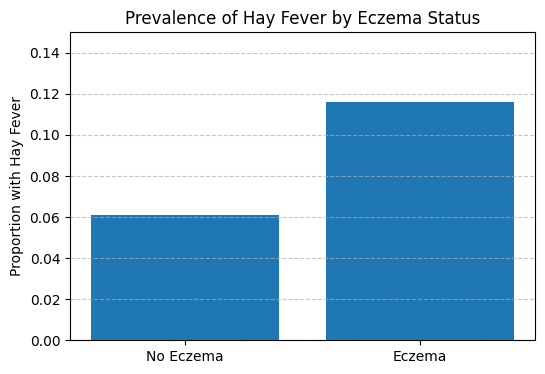

In [19]:
# Plot
plt.figure(figsize=(6, 4))
plt.bar(groups, risks)
plt.ylabel("Proportion with Hay Fever")
plt.title("Prevalence of Hay Fever by Eczema Status")
plt.ylim(0, 0.15)
plt.grid(axis='y', linestyle='--', alpha=0.7)

Text(50.72222222222221, 0.5, 'Eczema')

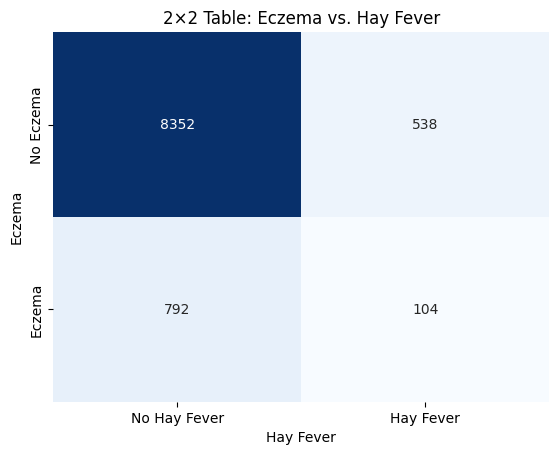

In [ ]:
table = pd.crosstab(df['eczema_ever'], df['hay_fever_ever'])

# Annotated heatmap
sns.heatmap(table, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Hay Fever", "Hay Fever"],
            yticklabels=["No Eczema", "Eczema"])
plt.title("2×2 Table: Eczema vs. Hay Fever")
plt.xlabel("Hay Fever")
plt.ylabel("Eczema")

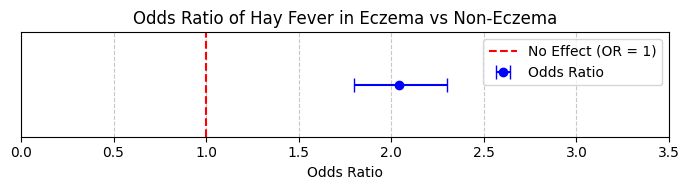

In [22]:
or_value = 2.039          # Odds Ratio
ci_lower = 1.80           # Lower bound of confidence interval
ci_upper = 2.30           # Upper bound of confidence interval
plt.figure(figsize=(7, 2))
plt.errorbar(
    x=or_value,
    y=0,
    xerr=[[or_value - ci_lower], [ci_upper - or_value]],
    fmt='o',
    color='blue',
    capsize=5,
    label="Odds Ratio"
)
plt.axvline(x=1, color='red', linestyle='--', label='No Effect (OR = 1)')
plt.xlim(0, 3.5)
plt.yticks([])
plt.xlabel("Odds Ratio")
plt.title("Odds Ratio of Hay Fever in Eczema vs Non-Eczema")
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

In [ ]:
#Conclusion: People with eczema have significantly higher odds of hay fever. The association is real and statistically significant.